### 1. Načtení dat ze serveru volby.cz.
Zvolené město: Mladá Boleslav

Data načítám do třech .csv souborů (souhrn.csv, k_listina.csv a kandidati.csv).

Kvůli rozdílům mezi daty z roku 2002 a ostatních let bylo třeba: 
- Sjednotit podobu desetinných oddělovačů u všech třech souborů.
- Ošetřit původní rozdílný počet vstupních sloupců u souboru kandidati.csv.
- Sjednotit akademické tituly jednotlivých kandidátů do jednoho sloupce.
- Sjednotit podobu prázdného pole u sloupečků "Mandát" a "Pořadí" v souboru kandidati.csv.

In [1]:
# importy
import pandas as pd
import requests
import html5lib
import bs4
import csv
import os

In [2]:
# funkce pro smazani souboru, ktery jiz existuje
# (ve funkcich nize pouzivam pri zapise do *.csv append, pri opakovanem spousteni dela neplechu)
def smaz_pokud_existuje(nazev_souboru):
    if os.path.exists(nazev_souboru):
        os.remove(nazev_souboru)

In [3]:
# strany
url_strany = {
    '2002' : 'https://www.volby.cz/pls/kv2002/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2107&xobec=535419',
    '2006' : 'https://www.volby.cz/pls/kv2006/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2107&xobec=535419&xstat=0&xvyber=0',
    '2010' : 'https://www.volby.cz/pls/kv2010/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2107&xobec=535419&xstat=0&xvyber=0',
    '2014' : 'https://www.volby.cz/pls/kv2014/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2107&xobec=535419&xstat=0&xvyber=0',
    '2018' : 'https://www.volby.cz/pls/kv2018/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2107&xobec=535419&xstat=0&xvyber=0',
}

for cislo_voleb, rok in enumerate(url_strany):
    # stažení dat z webu
    url = url_strany[rok]
    r = requests.get(url)
    html = r.text
    
    # desetinná místa:
    # rok 2002 (desetinná tečka)
    if cislo_voleb == 0:
        data = pd.read_html(html, flavor='html5lib', header=0)
    # ostatní roky (převod na des. tečku)
    else:
        data = pd.read_html(html, flavor='html5lib', header=0, decimal=',', thousands='.')
    
    # mnozstvi nacitanych tabulek (chci jen prvni 2)
    # teoreticky tam jsou jen dve, ale nejaky text pod nimi se nacita taky jako tabulka
    if len(data)>2:
        data = [data[0], data[1]]
    data = pd.DataFrame(data)    
    
    # zpracovani tabulek 1 (souhrn) a 2 (kandidatni listina)
    for cislo_tabulky in range(len(data)):
        tabulka = data[0][cislo_tabulky]
        tabulka.insert(0, "Rok", rok, True) # pridani sloupce "Rok" (hodnoty = rok voleb) - usnadneni pozdejsi prace s daty
        tabulka.iat[0, 0] = "Rok" # doplneni nazvu sloupce i pro druhy radek hlavicky
        
        #souhrn
        if cislo_tabulky == 0: 
            soubor_out = "souhrn.csv"
            if rok == "2002": #vypisuji i hlavicku
                smaz_pokud_existuje(soubor_out)
                tabulka.to_csv(soubor_out, mode='a', index=False)
            else: #pro zbyle roky uz jen udaje bez dvouradkove hlavicky
                tabulka = tabulka.drop(tabulka.index[0]) #maze jeden radek hlavicky
                tabulka.to_csv(soubor_out, mode='a', index=False, header=False) #nevypisuje zbyvajici jeden radek hlavicky
                
        #kandidatni listina
        else: 
            soubor_out = "k_listina.csv"
            if rok == "2002": #vypisuji i hlavicku
                smaz_pokud_existuje(soubor_out)
                tabulka.to_csv(soubor_out, mode='a', index=False)
            else: #pro zbyle roky uz jen udaje bez dvouradkove hlavicky
                tabulka = tabulka.drop(tabulka.index[0]) #maze jeden radek hlavicky
                tabulka.to_csv(soubor_out, mode='a', index=False, header=False) #nevypisuje zbyvajici jeden radek hlavicky

In [4]:
# načtení tabulek stran    
souhrn = pd.read_csv("souhrn.csv", header=[0,1])
# display(souhrn)
# souhrn.info()

k_listina = pd.read_csv("k_listina.csv", header=[0,1])
# display(k_listina)
# display(k_listina.head())
# display(k_listina.tail())
# k_listina.info()

In [5]:
# kandidati
url_kandidati = {
    '2002' : 'https://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=2107&xobec=535419&xstrana=0',
    '2006' : 'https://www.volby.cz/pls/kv2006/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=2107&xobec=535419&xstrana=0',
    '2010' : 'https://www.volby.cz/pls/kv2010/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=2107&xobec=535419&xstrana=0',
    '2014' : 'https://www.volby.cz/pls/kv2014/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=2107&xobec=535419&xstrana=0',
    '2018' : 'https://www.volby.cz/pls/kv2018/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=2107&xobec=535419&xstrana=0',
}

for cislo_voleb,rok in enumerate(url_kandidati):
    url = url_kandidati[rok]
    r = requests.get(url)
    html = r.text
    
     # rok 2002 (desetinná tečka)
    if cislo_voleb == 0:
        data = pd.read_html(html, flavor='html5lib', header=0)
    # ostatní roky (převod na des. tečku)
    else:
        data = pd.read_html(html, flavor='html5lib', header=0, decimal=',', thousands='.')

    df = pd.DataFrame(data)
    data = df[0][0]    
    data.insert(0, "Rok", rok, True) #pridani sloupce "Rok" 
    data.iat[0, 0] = "Rok" # doplneni nazvu sloupce i pro druhy radek hlavicky

    
    soubor_out = "kandidati.csv"
    if rok == "2002": #vypisuji i hlavicku
        smaz_pokud_existuje(soubor_out)
        data.to_csv(soubor_out, mode='a', index=False)
    else:        
        # presun titulu ze sloupce 4 "prijmeni, jmeno, titul" (pokud ho osoba ma) do samostatneho noveho sloupce 5 "tituly"
        jmena_tituly = data.iloc[:,4]     
        data.insert(5, "Tituly", None, True) #vložím sloupec "Tituly" s indexem 5 vyplneny hodnotami None
        
        for radek in range(len(jmena_tituly)):
            jmeno_titul = jmena_tituly[radek].split()            
            # treti a dalsi polozka seznamu "jmeno_titul" muze byt bud titul nebo jmeno (pokud ma osoba 2 prijmeni) 
            # titul muze byt i s mezerou -> napr. Ing. arch. -> splitem se rozdeli na dve polozky
            titul = [] # proto zakladam seznam na tituly pro kazdy radek
            jmeno = [] # sem ukladam polozky jmena
            
            for index_polozky in range(len(jmeno_titul)):
                if index_polozky > 1: # pro treti a dalsi polozku ve "jmeno_titul" testuji, zda nekonci na tecku (=> titul)
                    if jmeno_titul[index_polozky][-1] == ".": # pokud je posledni znak polozky tecka
                        if len(jmeno_titul[index_polozky]) > 2: # a polozka ma aspon 2 znaky, vcetne tecky => titul
                            titul.append(jmeno_titul[index_polozky])
                        else: # jinak se jedna o zkratku krestniho (napriklad "K.")
                            jmeno.append(jmeno_titul[index_polozky])
                    elif jmeno_titul[index_polozky].isupper():    #pro zachyceni titulu bez tecky (napr. MBA)
                        titul.append(jmeno_titul[index_polozky]) 
                    else: # pouze jmeno
                        jmeno.append(jmeno_titul[index_polozky])
                else: # prvni a druha polozka "jmeno_titul" => pouze prijmeni a jmeno
                    jmeno.append(jmeno_titul[index_polozky])
                
                # ulozim zmeny do dataframe
                data.iat[radek, 4] = " ".join(jmeno) # jmeno bez titulu vratim na puvodni misto
                if titul != []: # pokud má titul, presunu ho do vedlejsiho sloupce "Tituly"
                    data.iat[radek, 5] = " ".join(titul) 
        
        # sloupec "Poradi" - prevedeni "-" na hodnotu None
        data.iloc[:,11].replace({'-': None}, inplace=True)        
        # sloupec "Mandat" - prevedeni "-" na hodnotu None
        data.iloc[:,12].replace({'-': None}, inplace=True)

        # pro zbyle roky uz jen udaje bez dvouradkove hlavicky 
        data = data.drop(data.index[0]) #maze jeden radek hlavicky  
        data.to_csv(soubor_out, mode='a', index=False, header=False) #nevypisuje zbyvajici (jeden) radek hlavicky

In [6]:
# načtení tabulky kandidátů
kandidati = pd.read_csv('kandidati.csv', header=[0,1])
# display(kandidati)
# display(kandidati.head())
# display(kandidati.tail())
# kandidati.info()

### 2. Zpracování dat  z .csv souborů

**Zadání** :

* Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
* Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
* Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
* Časový vývoj podílu kandidujících s titulem a bez titulu.

In [7]:
# importy
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn as skit
import seaborn as sns

In [8]:
# funkce na dodatecne upravy dataframu

# funkce na odebrani mezer (napr. 34 899 -> 34899), pripadne i vymeni carku za tecku (34 899,00 -> 34899.00)
def uprav_mezeru_a_carku(dataframe, i_sloupcu):
    '''i_sloupcu jako list'''
    for sloupec in i_sloupcu:
        for radek in range(len(dataframe.iloc[:,sloupec])):
            dataframe.iloc[radek,sloupec] = "".join(dataframe.iat[radek,sloupec].split()).replace(',','.')

# funkce na zmenu sloupcu s indexem "sloupec" na numericky datovy typ (bud int nebo float, dle uvazeni)
def sloupce_to_numeric(dataframe, i_sloupcu):
    '''i_sloupcu jako list'''
    for sloupec in i_sloupcu:
        dataframe.iloc[:,sloupec] = pd.to_numeric(dataframe.iloc[:,sloupec])     

In [9]:
# uprava tabulky "souhrn" (df_s)

#kopie dat
df_s = souhrn.copy(deep=True) # tvoří hlubokou kopii (= nemění původní data)
df_s = df_s.drop(df_s.columns[1:6],  axis='columns') # odstraneni sloupcu, ktere nedavaji zadne podstatne info

# prevedeni obsahu bunek sloupcu s indexem "i_sloupcu" na cisla
i_sloupcu = [1,2,4,5]
uprav_mezeru_a_carku(df_s,i_sloupcu)
sloupce_to_numeric(df_s,i_sloupcu)

# display(df_s)
# df_s.info()   

In [10]:
# uprava tabulky "k_listina" (df_kl)

#kopie dat
df_kl = k_listina.copy(deep=True) # tvoří hlubokou kopii (= nemění původní data)

## potreba umazat mezeru a pak vyndat ',' a dat tam '.'
i_sloupcu = [3,6]
uprav_mezeru_a_carku(df_kl,i_sloupcu)
sloupce_to_numeric(df_kl,i_sloupcu)

# display(df_kl.head())
# display(df_kl.tail())
# df_kl.info() 

In [11]:
# uprava tabulky "kandidati" (df_k)

#kopie dat
df_k = kandidati.copy(deep=True) # tvoří hlubokou kopii (= nemění původní data)

# prevedeni obsahu bunek sloupcu s indexem "i_sloupcu" na cisla
i_sloupcu = [9] #list sloupcu (zde pouze jeden)
uprav_mezeru_a_carku(df_k,i_sloupcu)
sloupce_to_numeric(df_k,i_sloupcu)

# display(df_k.head(255))
# display(df_k.tail())
# df_k.info()  

In [12]:
# hlavičky

# display(df_s.head(2))
# display(df_kl.head(2))
# display(df_k.head(2))

- 1. úkol - časový vývoj:

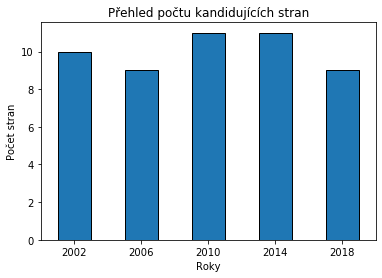

In [47]:
# a) poctu kandidujicich STRAN celkem HOTOVO

plt.figure()
#počítám řádky se stejným rokem => počet kandidujících stran v tom roce
celkem_stran = df_kl.iloc[:,0].value_counts(sort=False) 
celkem_stran.plot.bar(edgecolor="black")
plt.xticks(rotation=0)
plt.title('Přehled počtu kandidujících stran')
plt.xlabel('Roky')
plt.ylabel('Počet stran')
plt.show()

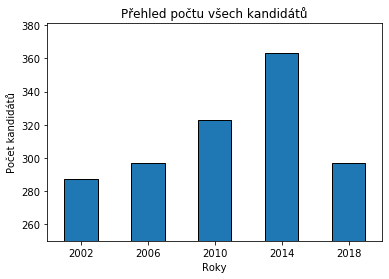

In [46]:
# b) poctu kandidujicich LIDI celkem HOTOVO

plt.figure()
#počítám řádky se stejným rokem => počet kandidujících lidí v tom roce
celkem_kandidatu = df_k.iloc[:,0].value_counts(sort=False)
celkem_kandidatu.plot.bar(edgecolor="black")
plt.xticks(rotation=0)
plt.title('Přehled počtu všech kandidátů')
plt.xlabel('Roky')
plt.ylim(250)
plt.ylabel('Počet kandidátů')
plt.show()

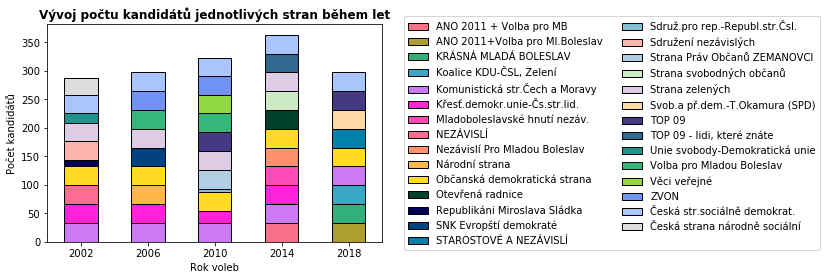

In [21]:
# c) po jednotlivych stranach (počet lidi kandidujicich ve strane, pokud ve volbach byla) HOTOVO

# jednotlive strany ze vsech let
strany = df_k.iloc[:,2].unique()
pocet_stran = len(strany)

# dataframe se tremi sloupci (rok, strana, pocet kandidatu)
df_pk = df_kl[[df_kl.columns[0],df_kl.columns[2],df_kl.columns[5]]]
df_pk.columns = ['rok','strana','pocet']

# přeorganizování df_pk na vhodnější tabulku pro vykreslení plotu
table = pd.pivot_table(df_pk, index=df_pk['strana'], columns=df_pk['rok'])

# barvičky
colorpalette = (sns.color_palette("husl",5)
                +sns.color_palette("spring",6)
                +sns.color_palette("ocean",5)
                +sns.color_palette("Pastel1",5)                
                +sns.color_palette("viridis",5)
                +sns.color_palette("coolwarm",5)
               )

# ticks
r = [0,1,2,3,4]
volby = pd.Series(df_k.iloc[:,0]).unique()

# plot

fig = plt.figure()
table.T.plot(kind='bar', stacked=True, ax=fig.gca(),color=colorpalette, edgecolor='black')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2)
plt.xticks(r, volby, rotation=0)
plt.xlabel("Rok voleb")
plt.ylabel("Počet kandidátů")
plt.title('Vývoj počtu kandidátů jednotlivých stran během let', weight='bold')
plt.show()

- 2. úkol - věková struktura:

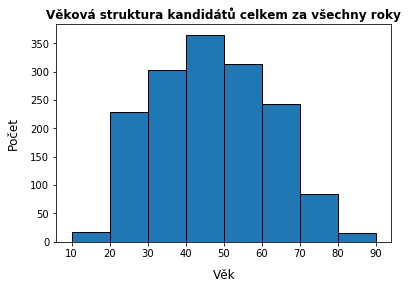

In [23]:
# a) vekova struktura kandidatu celkem HOTOVO

df_k.hist(column=df_k.columns[6], grid=False, edgecolor='black', bins=range(10,100,10))
plt.title('Věková struktura kandidátů celkem za všechny roky',weight='bold')
plt.xlabel('Věk', labelpad=10, size=12)
plt.ylabel('Počet', labelpad=10, size=12)
plt.show()

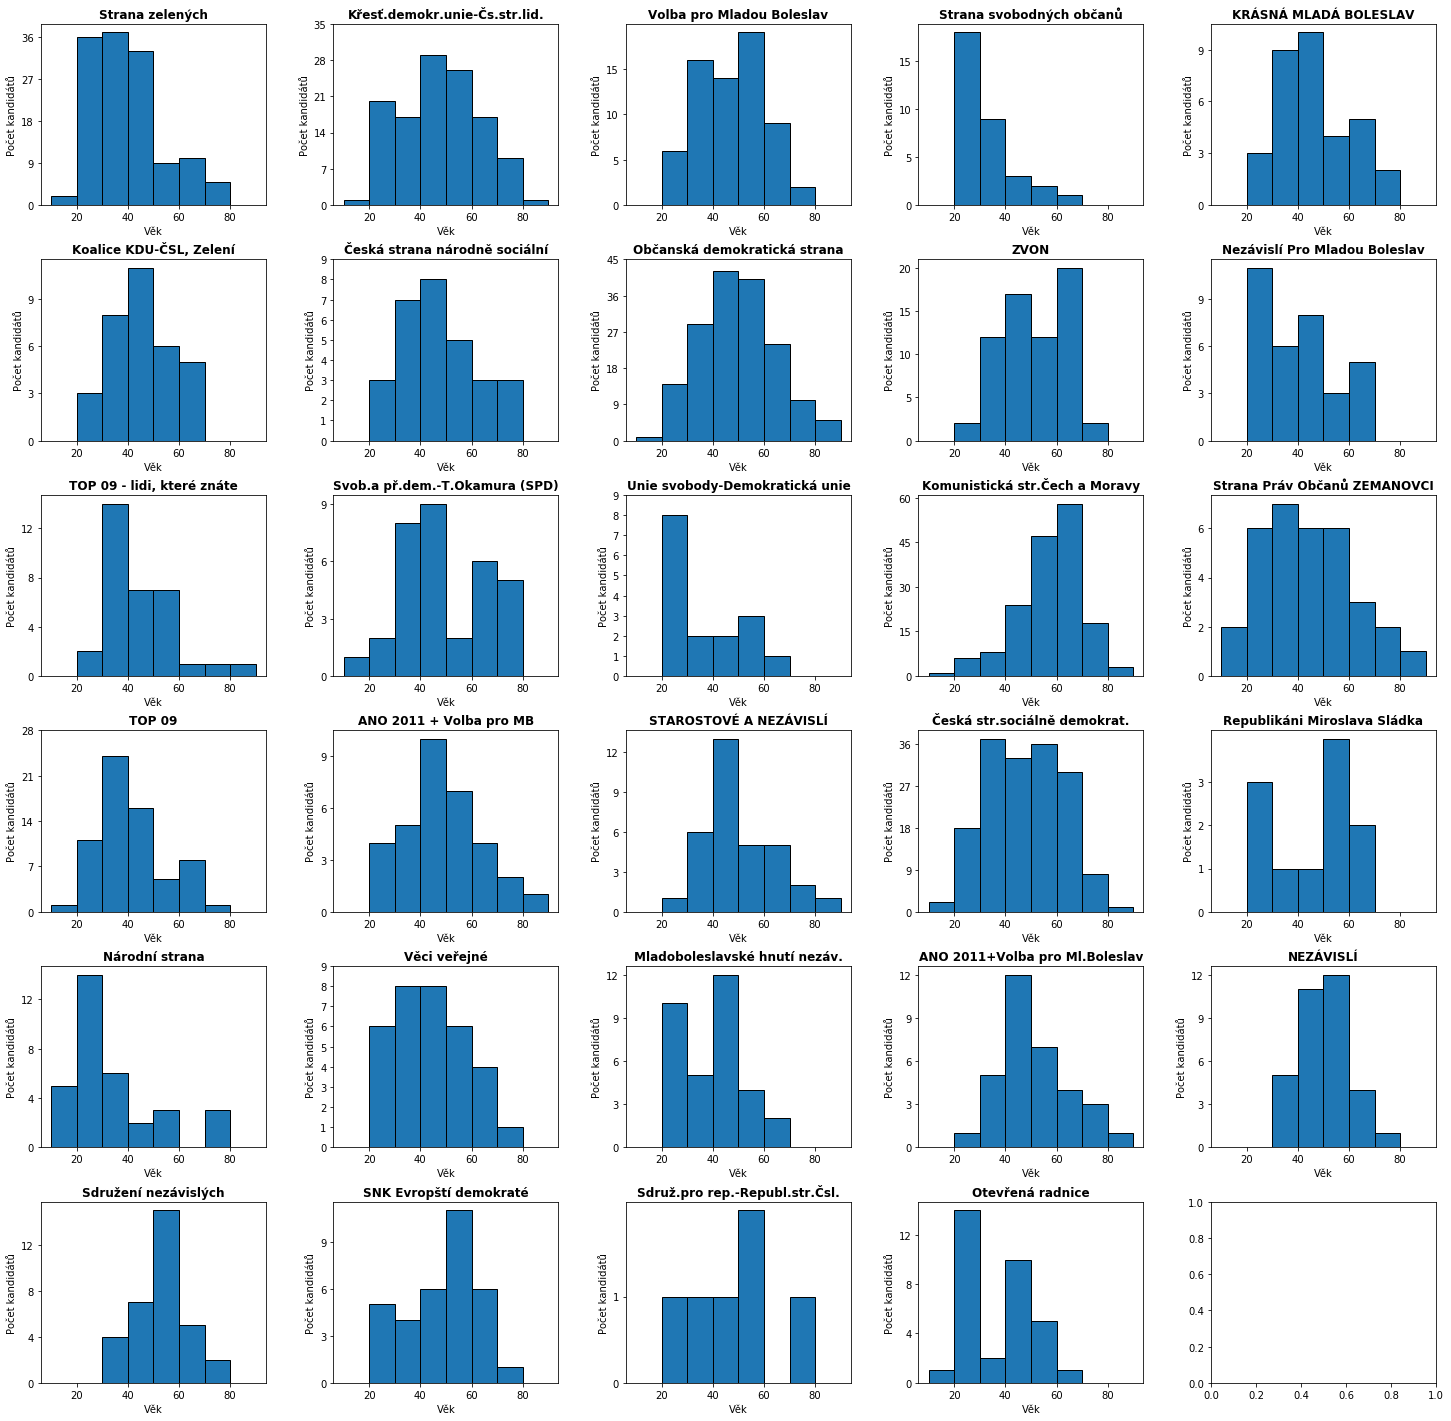

In [24]:
# b) vekova struktura za jednotlive strany HOTOVO
# strana_věk
s_v= df_k[[df_k.columns[2],df_k.columns[6]]]
# seznam nazvu stran
strany = df_k.iloc[:,2].unique()

# budu vykreslovat do jednoho figure
fig, axs = plt.subplots(6,5,figsize=[25, 25])

# bar plot pro každou stranu:
for i_strana in range(len(strany)):
#     pozice v figure
    ax = axs[i_strana%6,i_strana%5]
#     vyberu řádky, kde je daná strana
    strana_x = s_v[s_v[s_v.columns[0]]==strany[i_strana]]
#     ze sloupce, který obsahuje věk, udělám histogram
    strana_x.hist(column=strana_x.columns[1],grid=False, edgecolor='black', bins=range(10,100,10),ax=ax)
    ax.set_title(strany[i_strana], weight='bold') 
    ax.set_xlabel('Věk')  
    ax.set_ylabel('Počet kandidátů')
    
#     úprava rozsahu osy y
    y_ticks = ax.get_yticks() # získám aktuální...
#     ... upravim (snažím se zbavit takového toho "17.5 člověka" na ose y)
    if (int(round(y_ticks[-1])) % 2) != 0: # když nejvyšší číslo na ose y není sudé
        ax.set_yticks(range(0,int(y_ticks[-1]+1),int(0.2*int(y_ticks[-1])))) # range(from, to, step)
    else:
        ax.set_yticks(range(0,int(y_ticks[-1]),int(0.2*int(y_ticks[-1]))+1)) 

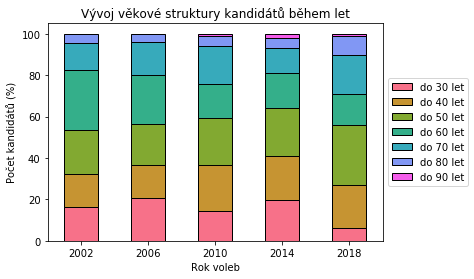

In [25]:
# c) vyvoj vekove struktury behem jednotlivych let HOTOVO

# rok_věk (r_v)
r_v = df_k[[df_k.columns[0],df_k.columns[6]]]
volby = r_v[r_v.columns[0]].unique()

# list hranic věkových kategorií 30 až 90 (po 10 letech)
v_kategorie = list(range(30, 100, 10))
# display(v_kategorie)

# slovník, kam uložím vzdy rok : počet lidí v různých věkových kategoriích
roky_kategorie = {}
# pro každý rok do těchto kategorií rozdělím
for rok in volby:    
#     pracuji vždy jen s částí dataframu, která se týká daného roku:
    df = pd.DataFrame(r_v[r_v.columns[1]][r_v[r_v.columns[0]]==rok]).reset_index(drop=True)
    df.columns=['Věk']    
    seznam_poctu = []    #  seznam počtů lidí ve věkových kategoriích
    for i, kategorie in enumerate(v_kategorie):
        if i == 0:  # do 30 let
            pocet = len(df[df['Věk']<kategorie])
        else:       # pro zbylé kategorie
            pocet = len(df['Věk'][(df['Věk']>=v_kategorie[i-1]) & (df['Věk']<kategorie)])
        seznam_poctu.append(pocet)        
    roky_kategorie[rok] = seznam_poctu # přidám do slovníku
    
# display(roky_kategorie) 

# ze slovníku vytvořím dataframe
data = pd.DataFrame(roky_kategorie)
data['kategorie do X let'] = v_kategorie
data = data.set_index('kategorie do X let')

# suma věků za rok:
suma_roky = [data.sum(axis = 0, skipna = True)]
suma_roky = list(suma_roky[0])

# z hodnot na procenta:
# vytvoreni barevnych kategorii
barva = {}
for i, kategorie in enumerate(v_kategorie):
    barva[f'do {kategorie} let'] = [i / j * 100 for i, j in zip(data.loc[kategorie],suma_roky)]
barvy = pd.DataFrame(barva)

# plot
r = [0,1,2,3,4]
fig = plt.figure()
#     fig.get_current_axes (da do aktualniho obrazku)
barvy.plot(kind='bar',stacked=True, ax=fig.gca(),color=sns.color_palette("husl",7), edgecolor='black') 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(r, volby, rotation=0)
plt.xlabel("Rok voleb")
plt.ylabel("Počet kandidátů (%)")
plt.title('Vývoj věkové struktury kandidátů během let')
plt.show()

- 3. úkol - časový vývoj volební účasti a volebních výsledků stran

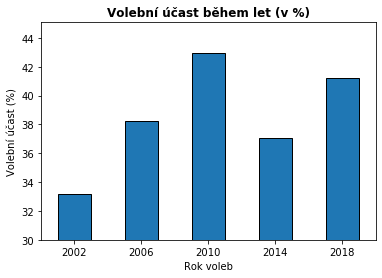

In [45]:
# a) volební účast HOTOVO

# rok_ucast:
# ze souhrnu vyberu sloupce [rok, volební účast v %]
r_u = df_s[[df_s.columns[0],df_s.columns[3]]]
# změním index na rok voleb (plot ho bude brát jako tick v bar plotu)
r_u = r_u.set_index(r_u.columns[0])
r_u.plot.bar(edgecolor="black")
plt.xticks(rotation=0)
plt.title('Volební účast během let (v %)',weight='bold')
plt.xlabel('Rok voleb')
plt.ylim(30)
plt.ylabel('Volební účast (%)')
plt.legend().set_visible(False)

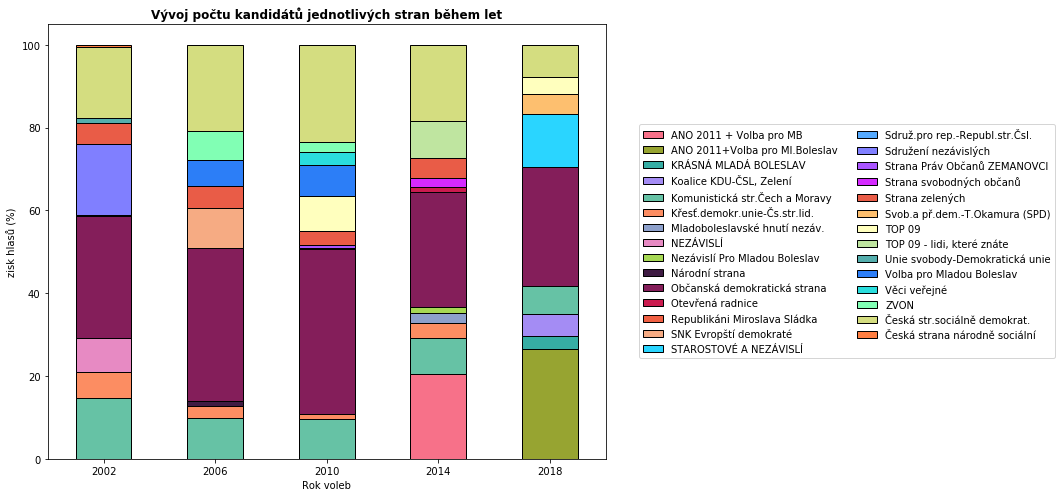

In [30]:
# b) volební výsledky jednotlivých stran (zisk v % hlasů) HOTOVO

# rok_strana_hlasy (rsh):
rsh = df_kl[[df_kl.columns[0], df_kl.columns[2], df_kl.columns[4]]]
rsh.columns = ['rok','strana','% hlasu']

# uprava dataframu pro usnadneni tvorby plotu
table = pd.pivot_table(rsh, index=rsh['strana'], columns=rsh['rok'])

colorpalette = (sns.color_palette("husl",4)
                +sns.color_palette("Set2",5)
                +sns.color_palette("rocket",5)
                +sns.color_palette("cool",5)                
                +sns.color_palette("Spectral",5)
                +sns.color_palette("rainbow",5)
               )
# plot
fig = plt.figure(figsize=[10, 8])
table.T.plot(kind='bar', stacked=True, ax=fig.gca(),color=colorpalette, edgecolor='black')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2)
plt.xticks(r, volby, rotation=0)
plt.xlabel("Rok voleb")
plt.ylabel("zisk hlasů (%)")
plt.title('Vývoj počtu kandidátů jednotlivých stran během let', weight='bold')
plt.show()

- 4. úkol - časový vývoj podílu kandidátu s/bez titulu

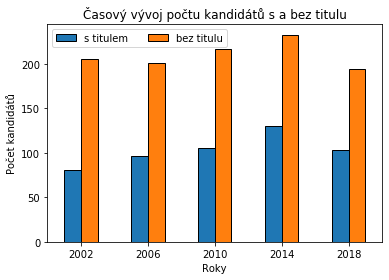

In [44]:
# podíl s:bez titulu HOTOVO

# rok_titul (r_t) dataframe - sloupce rok a titul
r_t = df_k[[df_k.columns[0],df_k.columns[5]]]

# rozdělím na řádky, kde je titul (titul_s) a kde není nic (titul_bez)
titul_s = r_t[r_t[r_t.columns[1]].notnull()]
titul_bez = r_t[r_t[r_t.columns[1]].isnull()]

# titul_roky (t_r) a nema_titul_roky (n_t_r)
t_r = titul_s[titul_s.columns[0]].value_counts(sort=False)
nt_r = titul_bez[titul_bez.columns[0]].value_counts(sort=False)

# počty s a bez titulu pro jednotlivé roky sloučím do dataframu
s_i_bez = pd.concat([t_r, nt_r], axis=1)
s_i_bez.columns=["s titulem","bez titulu"]

# plot:

s_i_bez.plot.bar(edgecolor="black")
plt.xticks(rotation=0)
plt.title('Časový vývoj počtu kandidátů s a bez titulu')
plt.xlabel('Roky')
plt.ylabel('Počet kandidátů')
plt.legend(loc='upper left', ncol=2)
plt.show()


 ### Bonusy
- (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
- (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
- (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

**1. rozlišení stupně vzdělání a odhad počtu žen**
- vyšší odborné vzdělání na konzervatoři - DiS.

- vysokoškolské – bakalářský studijní program Bc., BcA.

- vysokoškolské – magisterský studijní program Mgr., MgA., Ing., Ing. arch., MUDr., MDDr., MVDr.,JUDr., PhDr., RNDr., Pharm.Dr., ThLic., ThDr.                                        
- vysokoškolské – doktorský studijní program Ph.D., Th.D.

(zdroj: http://www.europass.cz/wp-content/uploads/porovnani1.pdf)

- profesní (nikoli akademické) tituly - MBA, MPA, BBA, DBA, MSc., LLM

(zdroj: https://www.vysokeskoly.cz/clanek/tituly-bba-dba-msc-llm-co-to-je-a-kde-to-ziskat)

JUC, PaedDr, apod. řadím do kategorie "vyskoškolské - magisterské"

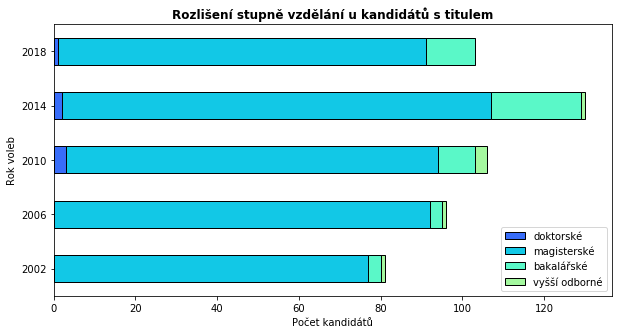

In [36]:
# a) rozliseni stupne vzdelani HOTOVO

# VOŠ (vyšší odborná), bakalářské, magisterské, doktorské (profesní nezařazuji, v df se vyskytují jen v kombinaci
#                                                          s vyssim)

VOS = ['DiS']
BC=  ['Bc','BcA']
MGR = ['Mgr','MgA','Ing','Ing.arch','MUDr','MDDr','MVDr','JUDr','PhDr','RNDr','Pharm.Dr','ThLic','ThDr',
        'PharmDr','PaedDr', 'JUC']
DOC = ['Ph.D','Th.D']
skala_titulu = [DOC, MGR, BC, VOS] # radim sestupne

# s tituly
s_tituly = df_k[[df_k.columns[0],df_k.columns[5]]][df_k[df_k.columns[5]].notnull()]

# vsechny druhy titulu v dataframu -> pouze pro kontrolu
typy_titulu = s_tituly[s_tituly.columns[1]].unique() 
# display(typy_titulu)

#     upravit podobu titulu
for radek in range(len(s_tituly)):
    s_tituly.iat[radek, 1] = " ".join((("".join(s_tituly.iloc[radek, 1].split())).strip('.')).split('.',1))
s_tituly.columns = ['rok','titul']
s_tituly = list(s_tituly.groupby(s_tituly['rok'])) 

# a tady bych chtela spocitat pocty titulu v kazde kategorii z "doc, mgr, bc, vos"
df = {}
for volby in range(len(s_tituly)):
    rok = s_tituly[volby][0]
    pocty_titulu = [0, 0, 0, 0] # vytvorim list ciselnych hodnot, ktere se budou navysovat (doc, mgr, bc, vos) 
    for index_radku in range(len(s_tituly[volby][1])):
        bunka = s_tituly[volby][1].iloc[index_radku,1]
        a = bunka.split()
        nasel_nejvyssi_titul = False
        for typ_titulu in range(len(skala_titulu)):
            for item in range(len(a)):
                if a[item] in skala_titulu[typ_titulu]:
                    pocty_titulu[typ_titulu] = pocty_titulu[typ_titulu] + 1
                    nasel_nejvyssi_titul = True
                    break
            if nasel_nejvyssi_titul == True:
                break
    # přidám do slovníku (rok:[doc, mgr, bc, vos]) -> počty titulů    
    df[rok] = pocty_titulu   

# plot lidi s titulem
df = pd.DataFrame(df).T

# plot
fig=plt.figure(figsize=[10,5])
df.columns = ['doktorské','magisterské','bakalářské','vyšší odborné']
df.plot(kind='barh',stacked=True, ax=fig.gca(), edgecolor="black", color=sns.color_palette("rainbow"))
plt.title("Rozlišení stupně vzdělání u kandidátů s titulem", weight="bold")
plt.xlabel("Počet kandidátů")
plt.ylabel("Rok voleb")
plt.show()

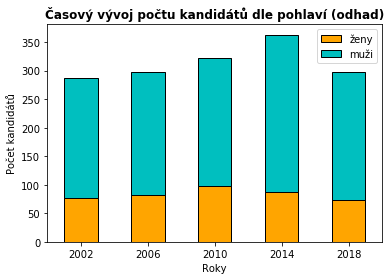

In [37]:
# b) odhad počtu žen HOTOVO
# odhadovat budu na zaklade koncovky prijmeni (zeny bez "ová" budou zde tedy bohuzel povazovany za muze)

# df [rok, jméno]
jmena = df_k[[df_k.columns[0],df_k.columns[4]]]#[df_k[df_k.columns[5]].notnull()]
jmena.columns=['rok','jmeno']

# seznam roků
roky = df_k[df_k.columns[0]].unique()

#tvorba dataframu (pro každý rok poměr ženy:muži)
roky_pohlavi = {}
for rok in roky:
    df_rok = jmena[:][jmena['rok']==rok] # pro kazdy rok vyberu vzdy jen radky, ktere ten rok obsahuji
    pohlavi = [0, 0] # zeny : muzi
    for i_radku in range(len(df_rok)):
        koncovka = df_rok.iloc[i_radku,1].split()[0][-3:] # posledni 3 pismena z prijmeni
        if koncovka =='ová': # zeny
            pohlavi[0] = pohlavi[0] + 1
        else: # muzi (a pripadne zeny s prijmenim bez "ová")
            pohlavi[1] = pohlavi[1] + 1
    roky_pohlavi[rok] = pohlavi

tabulka = pd.DataFrame(roky_pohlavi).T
tabulka.columns=['ženy','muži']

tabulka.plot(kind="bar", stacked=True, color=['orange','c'], edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel("Roky")
plt.ylabel("Počet kandidátů")
plt.title("Časový vývoj počtu kandidátů dle pohlaví (odhad)", weight="bold")
plt.show()

- 2. kandidoval nekdo ve vice volbach? 10 nejpilnejsich (jejich zisky a strany)

In [40]:
# a) kandidati ve vice volbach

# rok_cislo_jmeno_vek
data = df_k[[df_k.columns[4],df_k.columns[6],df_k.columns[0], df_k.columns[12]]].copy(deep=True)
data.columns = ['jmeno','vek','rok','mandat']
data['rok_nar'] = data["rok"] - data["vek"]

# uprava sloupce 'jmeno'
for i_radku in range(len(data)):
        data['jmeno'].iat[i_radku] = " ".join(data['jmeno'].iloc[i_radku].split())

# vytvorim skupiny podle jmena, roku narozeni: data.groupby(['col1','col2']).size() zjisti delku vzniklych skupin
pocet_kandidatur = data.groupby(['jmeno','rok_nar']).size() # pocet kandidatur, seradi dle abecedy
pocet_kandidatur = list(pocet_kandidatur)

# vyberu jen jméno,rok narození a vyhodím duplikáty, seradim dle abecedy (pak pridam jako dalsi sloupec do df)
df = data[['jmeno','rok_nar']].drop_duplicates(keep='first').sort_values(by='jmeno')

# df, kde jsou jmena, rok_nar a k nim i pocty kandidatur behem 5 voleb
df['pocet_kandidatur'] = pocet_kandidatur

# ted teda nevim, jak vybrat "nejpilnejsi kandidaty". protoze tech, co kandidovali kazdy rok voleb, je 31
# jako nejpilnejsi tedy vybiram ty nejstarsi s nejvetsi vydrzi - seradim sestupne podle kandidatur a vzest. dle rok_nar

df = df.sort_values(by=['pocet_kandidatur','rok_nar'],ascending=[False,True])
nejpilnejsi = df[:10] #vyberu prvnich 10
display(nejpilnejsi)

,jmeno,rok_nar,pocet_kandidatur
221,Skála Karel,1942,5
59,Hajný Rudolf,1943,5
138,Kvaizar Svatopluk,1944,5
103,Klipec Milan,1945,5
32,Čupík Jaroslav,1946,5
192,Pišinger Milan,1948,5
49,Francírek Pavel,1949,5
68,Heller Miroslav,1949,5
140,Lakatoš Jozef,1951,5
248,Švásta Karel,1951,5


In [43]:
# b) vypsat volebni zisky a strany 10 nejpilnejsich kandidatu

# display(nejpilnejsi)

# zase upravuji kvuli spatne prelozenemu stringu z roku 2002:
df_k = df_k.copy(deep=True)
for i_radku in range(len(df_k)):
        df_k[df_k.columns[4]].iat[i_radku] = " ".join(df_k[df_k.columns[4]].iloc[i_radku].split())

# vypisuji 10 "nejpilnejsich" kandidatu, dle mne zvolene definice (viz predchozi bunku)
for jmeno in nej_jmena:
    display(df_k[[df_k.columns[0],df_k.columns[2],df_k.columns[4],df_k.columns[5],
                  df_k.columns[6],df_k.columns[9],df_k.columns[10],df_k.columns[12]]][df_k[df_k.columns[4]] == jmeno])
    
    

,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
221,2002,Komunistická str.Čech a Moravy,Skála Karel,NaN,60,2328,4.67,*
520,2006,Komunistická str.Čech a Moravy,Skála Karel,NaN,64,1671,4.25,*
835,2010,Komunistická str.Čech a Moravy,Skála Karel,NaN,68,1650,3.92,*
1190,2014,Komunistická str.Čech a Moravy,Skála Karel,NaN,72,1299,4.21,*
1501,2018,Komunistická str.Čech a Moravy,Skála Karel,NaN,76,1001,3.99,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
59,2002,Sdružení nezávislých,Hajný Rudolf,Ing.,59,1904,3.26,NaN
354,2006,SNK Evropští demokraté,Hajný Rudolf,Ing.,63,1092,2.85,NaN
657,2010,Volba pro Mladou Boleslav,Hajný Rudolf,Ing.,67,936,2.82,NaN
976,2014,ANO 2011 + Volba pro MB,Hajný Rudolf,Ing.,71,2146,2.90,NaN
1338,2018,ANO 2011+Volba pro Ml.Boleslav,Hajný Rudolf,Ing.,75,2940,2.93,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
138,2002,Sdružení nezávislých,Kvaizar Svatopluk,Mgr.,58,3719,6.38,*
428,2006,SNK Evropští demokraté,Kvaizar Svatopluk,Mgr.,62,2568,6.70,*
730,2010,TOP 09,Kvaizar Svatopluk,Mgr.,66,1878,4.98,*
1082,2014,"TOP 09 - lidi, které znáte",Kvaizar Svatopluk,Mgr.,70,1824,5.59,*
1420,2018,STAROSTOVÉ A NEZÁVISLÍ,Kvaizar Svatopluk,Mgr.,74,1982,4.09,*


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
103,2002,Sdružení nezávislých,Klipec Milan,NaN,57,2188,3.75,*
397,2006,SNK Evropští demokraté,Klipec Milan,NaN,61,1451,3.78,NaN
701,2010,TOP 09,Klipec Milan,NaN,65,1387,3.67,NaN
1040,2014,Občanská demokratická strana,Klipec Milan,NaN,69,3268,3.29,NaN
1385,2018,Občanská demokratická strana,Klipec Milan,NaN,73,3377,3.09,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
32,2002,NEZÁVISLÍ,Čupík Jaroslav,NaN,56,1369,4.82,NaN
320,2006,Volba pro Mladou Boleslav,Čupík Jaroslav,NaN,60,814,3.34,NaN
617,2010,Volba pro Mladou Boleslav,Čupík Jaroslav,NaN,64,968,2.91,NaN
947,2014,ANO 2011 + Volba pro MB,Čupík Jaroslav,NaN,68,2094,2.83,NaN
1311,2018,ANO 2011+Volba pro Ml.Boleslav,Čupík Jaroslav,NaN,72,2896,2.89,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
192,2002,Česká str.sociálně demokrat.,Pišinger Milan,NaN,54,2139,3.70,*
486,2006,Česká str.sociálně demokrat.,Pišinger Milan,NaN,58,2875,3.48,*
801,2010,Česká str.sociálně demokrat.,Pišinger Milan,NaN,62,3352,3.24,*
1159,2014,Česká str.sociálně demokrat.,Pišinger Milan,NaN,66,2017,3.06,NaN
1474,2018,Česká str.sociálně demokrat.,Pišinger Milan,NaN,70,879,2.97,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
49,2002,Občanská demokratická strana,Francírek Pavel,Ing.,53,3531,3.54,*
345,2006,Občanská demokratická strana,Francírek Pavel,Ing.,57,4741,3.23,*
650,2010,Občanská demokratická strana,Francírek Pavel,Ing.,61,5497,3.12,*
967,2014,Občanská demokratická strana,Francírek Pavel,Ing.,65,3079,3.10,*
1330,2018,Občanská demokratická strana,Francírek Pavel,Ing.,69,3289,3.01,*


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
68,2002,Komunistická str.Čech a Moravy,Heller Miroslav,NaN,53,1466,2.94,NaN
360,2006,Komunistická str.Čech a Moravy,Heller Miroslav,NaN,57,1169,2.97,NaN
667,2010,Komunistická str.Čech a Moravy,Heller Miroslav,NaN,61,1208,2.87,NaN
983,2014,Komunistická str.Čech a Moravy,Heller Miroslav,NaN,65,849,2.75,NaN
1346,2018,Komunistická str.Čech a Moravy,Heller Miroslav,NaN,69,713,2.84,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
140,2002,Občanská demokratická strana,Lakatoš Jozef,NaN,51,2587,2.59,NaN
431,2006,Občanská demokratická strana,Lakatoš Jozef,NaN,55,4017,2.74,NaN
733,2010,Občanská demokratická strana,Lakatoš Jozef,NaN,59,5060,2.87,NaN
1084,2014,Občanská demokratická strana,Lakatoš Jozef,NaN,63,2701,2.72,NaN
1422,2018,Občanská demokratická strana,Lakatoš Jozef,NaN,67,3105,2.84,NaN


,Rok,Kandidátnílistina.1,Kandidát,Kandidát.1,Věk,Hlasy,Hlasy.1,Mandát
,Rok,Kandidátnílistina,"Příjmení, jméno",Tituly,Věk,abs.,v %,Mandát
248,2002,NEZÁVISLÍ,Švásta Karel,NaN,51,780,2.75,NaN
545,2006,Volba pro Mladou Boleslav,Švásta Karel,NaN,55,639,2.62,NaN
867,2010,Volba pro Mladou Boleslav,Švásta Karel,NaN,59,876,2.64,NaN
1218,2014,ANO 2011 + Volba pro MB,Švásta Karel,NaN,63,2100,2.84,NaN
1533,2018,ANO 2011+Volba pro Ml.Boleslav,Švásta Karel,NaN,67,2894,2.88,NaN
